In [3]:
!ls data

ua.base  ua.test


In [4]:
import torch
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
train = pd.read_csv("data/ua.base", sep="\t", names=['user','movie','rating','timestamp'])
test = pd.read_csv("data/ua.test", sep="\t", names=['user','movie','rating','timestamp'])
test

,user,movie,rating,timestamp
0,1,20,4,887431883
1,1,33,4,878542699
2,1,61,4,878542420
3,1,117,3,874965739
4,1,155,2,878542201
...,...,...,...,...
9425,943,232,4,888639867
9426,943,356,4,888639598
9427,943,570,1,888640125
9428,943,808,4,888639868


In [6]:
items = torch.LongTensor(train['movie'])
users = torch.LongTensor(train['user'])
ratings = torch.FloatTensor(train['rating'])

items_test = torch.LongTensor(test['movie'])
users_test = torch.LongTensor(test['user'])
ratings_test = torch.FloatTensor(test['rating'])

In [7]:
rank = 100
numItems = items.max() + 1
numUsers = users.max() + 1

P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)
bias_user = torch.randn(numUsers, requires_grad=True)
bias_item = torch.randn(numItems, requires_grad=True)
mean = ratings.sum() / len(ratings)

optimizer = torch.optim.Adam([P,Q], lr=0.1)

lambda1 = 0.00001
lambda2 = 0.00001
lambda3 = 0.0001 #bias_item
lambda4 = 0.0001 #bias_user

X = []
Y = []
Y_test = []
for epoch in range(1001):
  hypothesis = torch.sum(P[items] * Q[users], dim=1) + mean + bias_item[items] + bias_user[users]
  # mse = torch.mean((hypothesis-ratings) ** 2)
  mse = F.mse_loss(hypothesis, ratings)
  # 정규화항 추가한 cost
  cost = mse + lambda1* (P ** 2).sum() + lambda2 * (Q ** 2).sum() + \
  lambda3 * (bias_item ** 2).sum() + lambda4 * (bias_user ** 2).sum()

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  with torch.no_grad():
    hypo_test = torch.sum(P[items_test] * Q[users_test], dim=1) + mean + \
    bias_item[items_test] + bias_user[users_test]
    mse_test = F.mse_loss(hypo_test, ratings_test)

    X.append(epoch)
    Y.append(mse.item())
    Y_test.append(mse_test.item())

  if epoch % 100 == 0:
    print(f"epoch: {epoch}, cost: {mse.item():.6f}")

epoch: 0, cost: 105.128906
epoch: 100, cost: 0.064787
epoch: 200, cost: 0.021128
epoch: 300, cost: 0.012138
epoch: 400, cost: 0.009203
epoch: 500, cost: 0.007900
epoch: 600, cost: 0.007199
epoch: 700, cost: 0.006763
epoch: 800, cost: 0.006468
epoch: 900, cost: 0.006242
epoch: 1000, cost: 0.006073


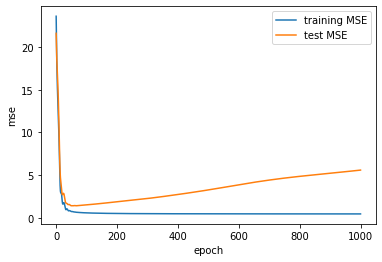

In [ ]:
plt.xlabel("epoch")
plt.ylabel("mse")
plt.plot(X, Y, label="training MSE")
plt.plot(X, Y_test, label="test MSE")
plt.legend()
plt.show()

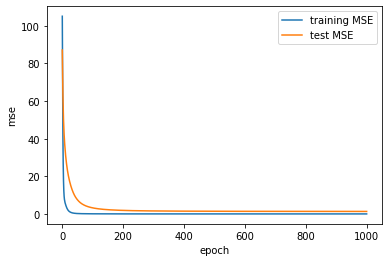

In [8]:
plt.xlabel("epoch")
plt.ylabel("mse")
plt.plot(X, Y, label="training MSE")
plt.plot(X, Y_test, label="test MSE")
plt.legend()
plt.show()